In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [8]:
data1 = pd.read_csv('C:/Users/teleu/.data/Panaretos/ML & AI Seminar/heart_failure_clinical_records_dataset.csv')
data1.head() #Categorical variables have been encoded as '0' and '1'.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
print(data1.isnull().sum()) #No missing values.

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [10]:
print(len(data1['DEATH_EVENT'])) #299 rows in the dataset.

299


C:\Users\teleu\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


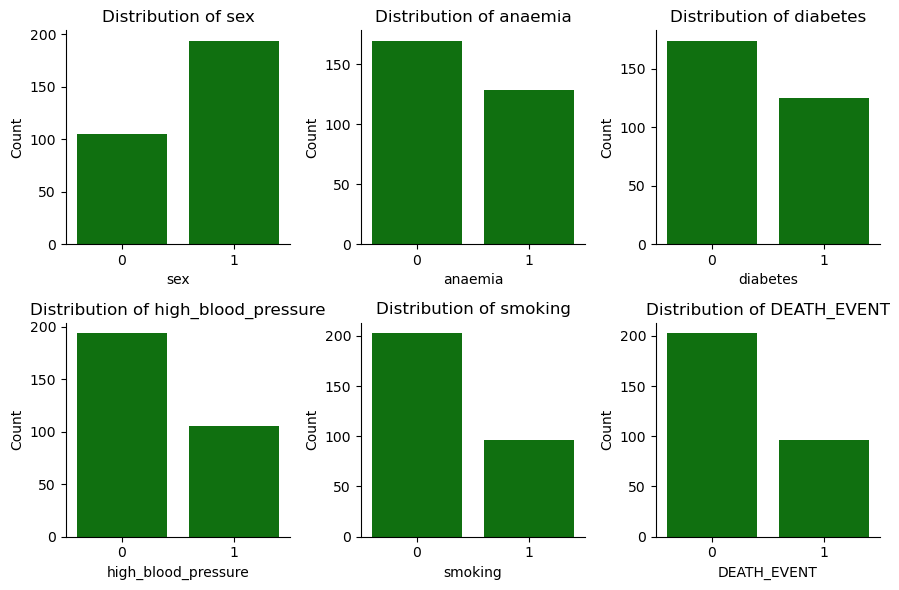

In [29]:
numerical_cols = ['age','creatinine_phosphokinase','ejection_fraction',
                 'platelets','serum_creatinine','serum_sodium','time']
categorical_cols = ['sex','anaemia','diabetes','high_blood_pressure','smoking','DEATH_EVENT']

cat_melted = data1.melt(value_vars = categorical_cols)
g = sns.FacetGrid(cat_melted, col = 'variable', col_wrap = 3, sharex = False, sharey = False)
g.map(sns.countplot, "value", color = 'green')
for ax, title in zip(g.axes,categorical_col):
    ax.set_title(f'Distribution of {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Count')
    
plt.tight_layout()
plt.show()

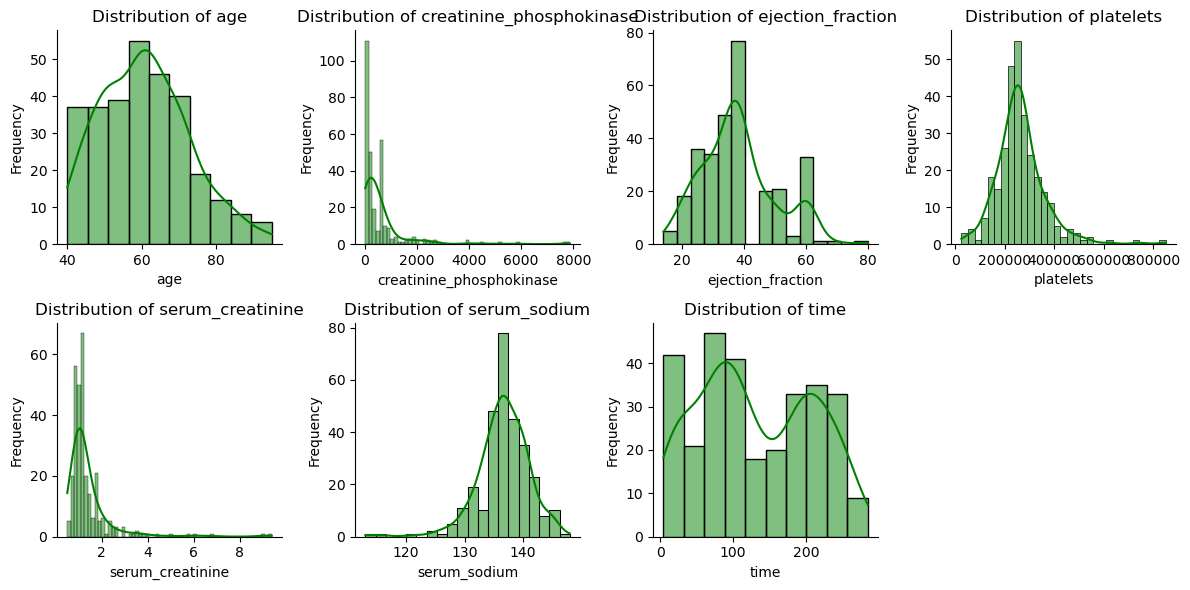

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64


In [35]:
num_melted = data1.melt(value_vars = numerical_cols)
g = sns.FacetGrid(num_melted, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
g.map(sns.histplot, 'value', color = 'green', kde = True)
for ax, title in zip(g.axes, numerical_cols):
    ax.set_title(f'Distribution of {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()
print(data1['serum_creatinine'].describe(percentiles=[.25,.5,.75]))
#Potential outliers in serum_creatinine as 75% is 1.4 and max 9.4 .